## Below scripts helps to displays, Without F-PKI, with F-PKI (with WebAssembly), and with F-PKI (without WebAssembly) average page load times for 59 countries for all websites. 


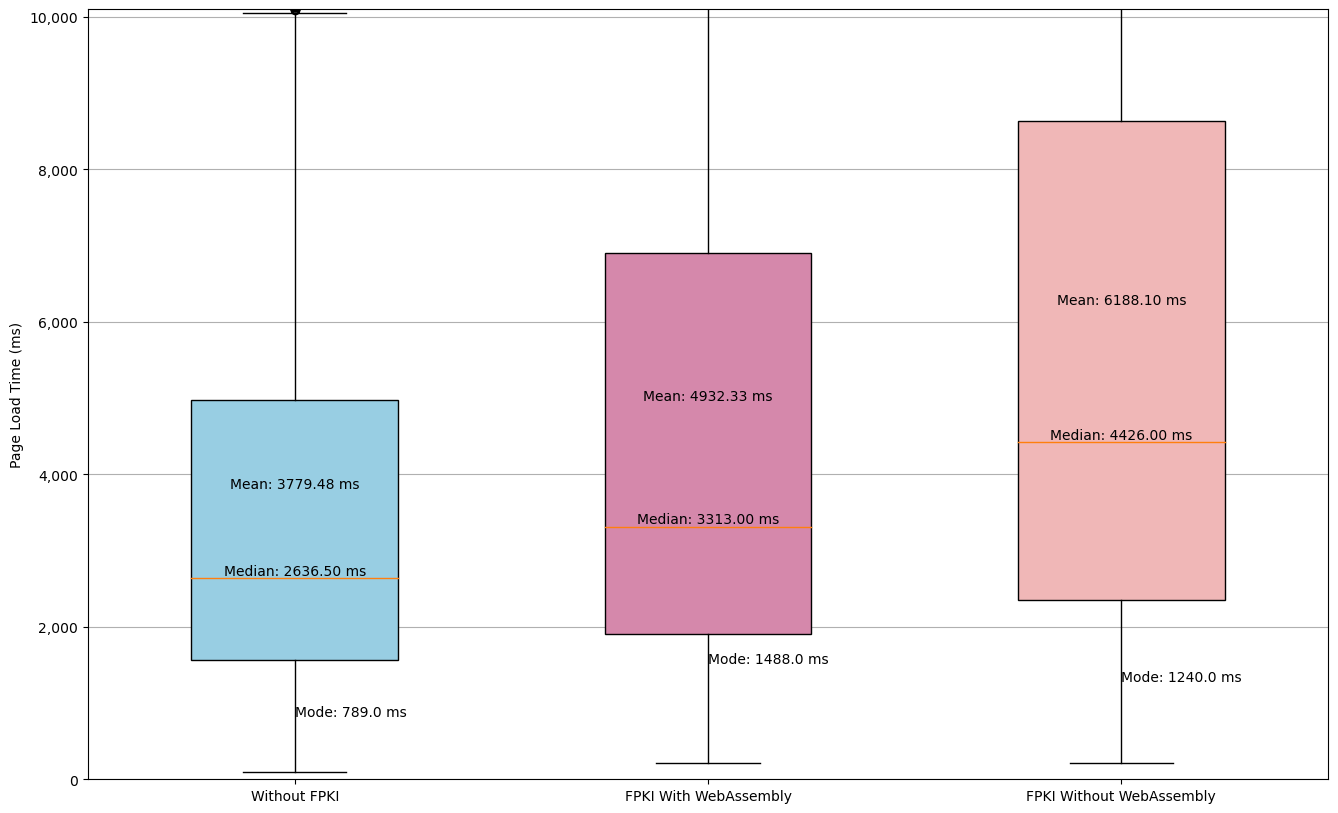

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df1_cleaned = pd.read_csv('new_first_phase_withoutsevenwebsites.csv')
df2_cleaned = pd.read_csv('new_second_phase_withoutsevenwebsites.csv')
df3_cleaned = pd.read_csv('new_third_phase_withoutsevenwebsites.csv')


df1_cleaned = df1_cleaned.dropna(subset=['Page Load Time'])
df2_cleaned = df2_cleaned.dropna(subset=['Page Load Time'])
df3_cleaned = df3_cleaned.dropna(subset=['Page Load Time'])

df1_cleaned = df1_cleaned[df1_cleaned['WASM RTT'] != 'Waiting time exceeds 10 seconds']
df2_cleaned = df2_cleaned[df2_cleaned['Without WASM RTT'] != 'Waiting time exceeds 10 seconds']


def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

df1_cleaned_no_outliers = remove_outliers(df1_cleaned['Page Load Time'])
df2_cleaned_no_outliers = remove_outliers(df2_cleaned['Page Load Time'])
df3_cleaned_no_outliers = remove_outliers(df3_cleaned['Page Load Time'])

mean_df1 = df1_cleaned_no_outliers.mean()
median_df1 = df1_cleaned_no_outliers.median()
mode_df1 = df1_cleaned_no_outliers.mode().iloc[0]

mean_df2 = df2_cleaned_no_outliers.mean()
median_df2 = df2_cleaned_no_outliers.median()
mode_df2 = df2_cleaned_no_outliers.mode().iloc[0]

mean_df3 = df3_cleaned_no_outliers.mean()
median_df3 = df3_cleaned_no_outliers.median()
mode_df3 = df3_cleaned_no_outliers.mode().iloc[0]

fig, ax = plt.subplots(figsize=(16, 10))

colors = ['#98CEE3', '#D588AB', '#F0B7B7']

boxplots = ax.boxplot([df3_cleaned_no_outliers, df1_cleaned_no_outliers, df2_cleaned_no_outliers],
           labels=['Without FPKI', 'FPKI With WebAssembly', 'FPKI Without WebAssembly'],
           patch_artist=True, widths=0.5)  

for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)


ax.set_ylim(0, 10100)
ax.set_ylabel('Page Load Time (ms)')
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


for i, (mean, median, mode) in enumerate(zip([mean_df3, mean_df1, mean_df2],
                                              [median_df3, median_df1, median_df2],
                                              [mode_df3, mode_df1, mode_df2])):
    ax.text(i+1, mean, f"Mean: {mean:.2f} ms", ha='center', va='bottom')
    ax.text(i+1, median, f"Median: {median:.2f} ms", ha='center', va='bottom')
    ax.text(i+1, mode, f"Mode: {mode} ms", ha='left', va='bottom')


#plt.savefig("pageloadtime.png", dpi=300, bbox_inches='tight')  
plt.show()


## Below scripts helps to displays With F-PKI and without F-PKI (with and without WebAssembly) average page load time for each of the 59 countries. 

/var/folders/s_/_j_p7ynd17x8z8g_l8b2yw180000gn/T/ipykernel_6749/51240015.py:51: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_x = mode(average_page_load_time_x_sorted)[0][0]
/var/folders/s_/_j_p7ynd17x8z8g_l8b2yw180000gn/T/ipykernel_6749/51240015.py:55: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

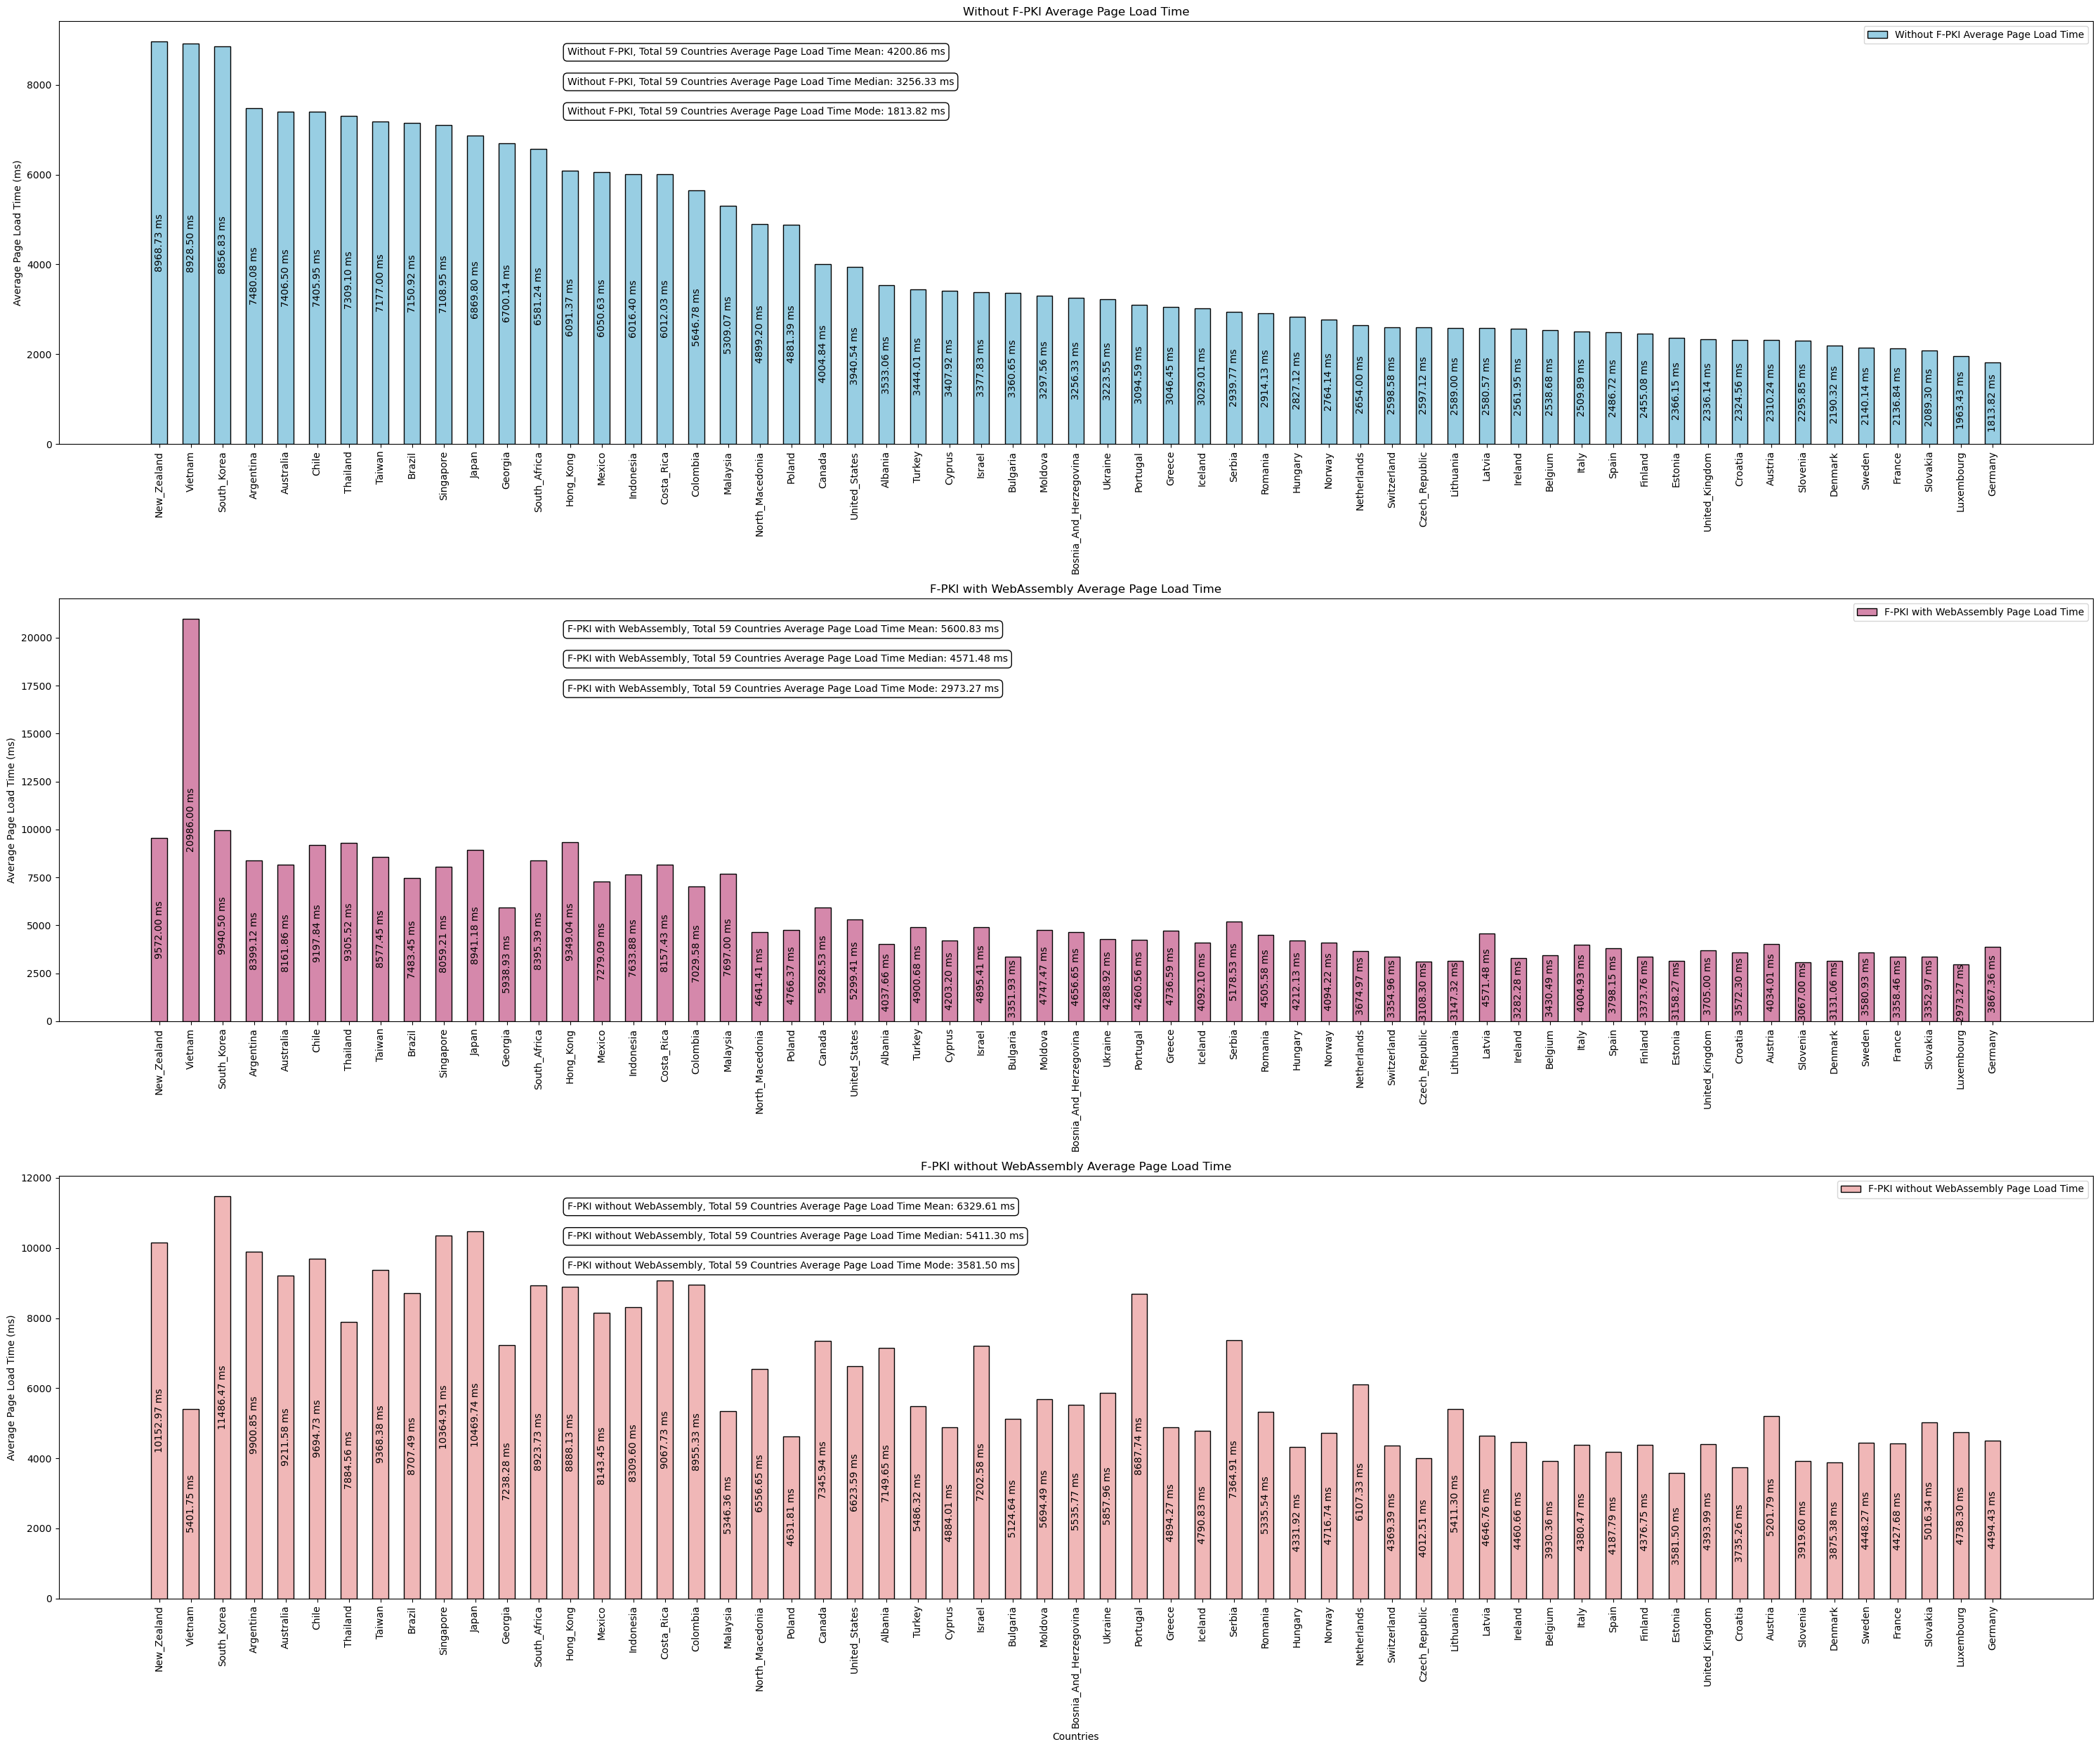

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

merge = pd.read_csv('new_4th1st2ndmerged_without10sec.csv')
merge = merge.dropna()

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

def remove_outliers2(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.77)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

merge['Page Load Time'] = remove_outliers(merge['Page Load Time'])
merge['Page Load Time_x'] = remove_outliers2(merge['Page Load Time_x'])
merge['Page Load Time_y'] = remove_outliers2(merge['Page Load Time_y'])


average_page_load_time_x = merge.groupby('Country')['Page Load Time'].mean()
average_page_load_time_y = merge.groupby('Country')['Page Load Time_x'].mean()
average_page_load_time_z = merge.groupby('Country')['Page Load Time_y'].mean()


average_page_load_time_x_sorted = average_page_load_time_x.sort_values(ascending=False)
average_page_load_time_y_sorted = average_page_load_time_y.sort_values(ascending=False)
average_page_load_time_z_sorted = average_page_load_time_z.sort_values(ascending=False)

common_websites = list(set(average_page_load_time_x_sorted.index).intersection(average_page_load_time_y_sorted.index).intersection(average_page_load_time_z_sorted.index))

average_page_load_time_x_sorted = average_page_load_time_x_sorted.loc[common_websites]
average_page_load_time_y_sorted = average_page_load_time_y_sorted.loc[common_websites]
average_page_load_time_z_sorted = average_page_load_time_z_sorted.loc[common_websites]

mean_values_x = average_page_load_time_x_sorted.values
mean_values_y = average_page_load_time_y_sorted.values
mean_values_z = average_page_load_time_z_sorted.values

mean_x = average_page_load_time_x_sorted.mean()
median_x = average_page_load_time_x_sorted.median()
mode_x = mode(average_page_load_time_x_sorted)[0][0]

mean_y = average_page_load_time_y_sorted.mean()
median_y = average_page_load_time_y_sorted.median()
mode_y = mode(average_page_load_time_y_sorted)[0][0]

mean_z = average_page_load_time_z_sorted.mean()
median_z = average_page_load_time_z_sorted.median()
mode_z = mode(average_page_load_time_z_sorted)[0][0]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 25))

width = 0.50
x = np.arange(len(common_websites))
x_sorted = sorted(range(len(average_page_load_time_x_sorted)), key=lambda i: average_page_load_time_x_sorted.iloc[i], reverse=True)
rects1 = ax1.bar(x, average_page_load_time_x_sorted.values[x_sorted], width, edgecolor='black', color='#98CEE3', label='Without F-PKI Average Page Load Time')
ax1.set_ylabel('Average Page Load Time (ms)')
ax1.set_title('Without F-PKI Average Page Load Time')


for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{mean_values_x[x_sorted[i]]:.2f} ms', ha='center', va='center', rotation='vertical')

ax1.text(0.25, 0.92, f"Without F-PKI, Total 59 Countries Average Page Load Time Mean: {mean_x:.2f} ms", transform=ax1.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax1.text(0.25, 0.85, f"Without F-PKI, Total 59 Countries Average Page Load Time Median: {median_x:.2f} ms", transform=ax1.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax1.text(0.25, 0.78, f"Without F-PKI, Total 59 Countries Average Page Load Time Mode: {mode_x:.2f} ms", transform=ax1.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

rects2 = ax2.bar(x, average_page_load_time_y_sorted.values[x_sorted], width, edgecolor='black', color='#D588AB', label='F-PKI with WebAssembly Page Load Time')
ax2.set_ylabel('Average Page Load Time (ms)')
ax2.set_title('F-PKI with WebAssembly Average Page Load Time')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{mean_values_y[x_sorted[i]]:.2f} ms', ha='center', va='center', rotation='vertical')

ax2.text(0.25, 0.92, f"F-PKI with WebAssembly, Total 59 Countries Average Page Load Time Mean: {mean_y:.2f} ms", transform=ax2.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax2.text(0.25, 0.85, f"F-PKI with WebAssembly, Total 59 Countries Average Page Load Time Median: {median_y:.2f} ms", transform=ax2.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax2.text(0.25, 0.78, f"F-PKI with WebAssembly, Total 59 Countries Average Page Load Time Mode: {mode_y:.2f} ms", transform=ax2.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

rects3 = ax3.bar(x, average_page_load_time_z_sorted.values[x_sorted], width, edgecolor='black', color='#F0B7B7', label='F-PKI without WebAssembly Page Load Time')
ax3.set_ylabel('Average Page Load Time (ms)')
ax3.set_title('F-PKI without WebAssembly Average Page Load Time')

for i, rect in enumerate(rects3):
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{mean_values_z[x_sorted[i]]:.2f} ms', ha='center', va='center', rotation='vertical')

ax3.text(0.25, 0.92, f"F-PKI without WebAssembly, Total 59 Countries Average Page Load Time Mean: {mean_z:.2f} ms", transform=ax3.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax3.text(0.25, 0.85, f"F-PKI without WebAssembly, Total 59 Countries Average Page Load Time Median: {median_z:.2f} ms", transform=ax3.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax3.text(0.25, 0.78, f"F-PKI without WebAssembly, Total 59 Countries Average Page Load Time Mode: {mode_z:.2f} ms", transform=ax3.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

ax1.set_xticks(x)
ax1.set_xticklabels(average_page_load_time_x_sorted.index[x_sorted], rotation=90)
ax2.set_xticks(x)
ax2.set_xticklabels(average_page_load_time_x_sorted.index[x_sorted], rotation=90)
ax3.set_xticks(x)
ax3.set_xticklabels(average_page_load_time_x_sorted.index[x_sorted], rotation=90)

ax3.set_xlabel('Countries')

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
#plt.savefig("rq3countrypageloadtime.png", dpi=300, bbox_inches='tight')  
plt.show()
